<a href="https://colab.research.google.com/github/Shrushti-2002/street-food-forecaster/blob/main/street_food_forecaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
# Step 1: Load data
data = pd.DataFrame({
    'item': ['Vada Pav', 'Pav Bhaji', 'Bhel Puri', 'Sev Puri', 'Dabeli', 'Samosa', 'Bharat Vada Pav',
             'Misal Pav', 'Sabudana Vada', 'Pani Puri'],
    'base_price': [25, 35, 20, 18, 22, 15, 28, 40, 30, 12],
    'onion_price': [40, 42, 38, 41, 39, 43, 40, 45, 37, 39],
    'oil_price': [180, 185, 175, 182, 178, 188, 180, 190, 172, 177],
    'chili_price': [250, 255, 245, 252, 248, 258, 250, 260, 242, 247],
    'season': ['summer', 'monsoon', 'winter', 'summer', 'monsoon', 'winter', 'summer', 'monsoon', 'winter', 'summer']
})

In [177]:
data.head()

,item,base_price,onion_price,oil_price,chili_price,season
0,Vada Pav,25,40,180,250,summer
1,Pav Bhaji,35,42,185,255,monsoon
2,Bhel Puri,20,38,175,245,winter
3,Sev Puri,18,41,182,252,summer
4,Dabeli,22,39,178,248,monsoon


In [178]:
# FIXED: Keep original data for plotting + create encoded copy for modeling
data_encoded = pd.get_dummies(data, columns=['season'], prefix='season')
X = data_encoded.drop(['item', 'base_price'], axis=1)
y = data_encoded['base_price']

In [179]:
# Step 2: Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [180]:
# Metrics
print("Model Performance:")
print(f"Train MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"Test R²: {r2_score(y_test, y_pred_test):.3f}")

Model Performance:
Train MAE: 4.52
Test MAE: 9.73
Test R²: -14.808


In [181]:
print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.3f}")


Feature Coefficients:
onion_price: 9.809
oil_price: -1.846
chili_price: -1.846
season_monsoon: 4.778
season_summer: -1.541
season_winter: -3.236


In [182]:
# Step 3: Forecast example
future_data = pd.DataFrame({
    'onion_price': [50], 'oil_price': [220], 'chili_price': [300],
    'season_monsoon': [1], 'season_summer': [0], 'season_winter': [0]
})
forecast = model.predict(future_data)[0]
print(f"\nForecasted Vada Pav (next monsoon): ₹{forecast:.2f}")


Forecasted Vada Pav (next monsoon): ₹-41.87


In [183]:
# Step 4: Forecast future prices (example: next season with inflated ingredients)
future_data = pd.DataFrame({
    'onion_price': [50],  # +25% inflation
    'oil_price': [220],
    'chili_price': [300],
    'season_monsoon': [1],
    'season_summer': [0],
    'season_winter': [0]
})
forecast = model.predict(future_data)[0]
print(f"\nForecasted Vada Pav price in next monsoon (inflated ingredients): ₹{forecast:.2f}")


Forecasted Vada Pav price in next monsoon (inflated ingredients): ₹-41.87


In [184]:
plt.style.use('default')
fig = plt.figure(figsize=(20, 24))

In [185]:
# 1. Price distribution
plt.subplot(4, 3, 1)
plt.hist(data['base_price'], bins=5, alpha=0.7, color='orange', edgecolor='black')
plt.title('Street Food Price Distribution')
plt.xlabel('Price (₹)')

Text(0.5, 0, 'Price (₹)')

In [186]:
# 2. FIXED: Use original 'data' for season plots
plt.subplot(4, 3, 2)
season_order = ['summer', 'monsoon', 'winter']
sns.boxplot(data=data, x='season', y='base_price', order=season_order)  # ✅ Uses original data
plt.title('Price by Season')
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'summer'), Text(1, 0, 'monsoon'), Text(2, 0, 'winter')])

In [187]:
# 3. Correlation heatmap (numeric features only)
plt.subplot(4, 3, 3)
numeric_cols = ['base_price', 'onion_price', 'oil_price', 'chili_price']
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlation Matrix')

Text(0.5, 1.0, 'Feature Correlation Matrix')

In [188]:
# 4. Ingredient vs price scatter
plt.subplot(4, 3, 4)
for col in ['onion_price', 'oil_price', 'chili_price']:
    plt.scatter(data[col], data['base_price'], alpha=0.7, label=col)
plt.xlabel('Ingredient Price (₹)')
plt.ylabel('Street Food Price (₹)')
plt.title('Ingredient Prices vs Food Price')
plt.legend()

In [189]:
# 5. Residuals plot
plt.subplot(4, 3, 5)
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

Text(0.5, 1.0, 'Residuals Plot')

In [190]:
# 6. FIXED: Seasonal trend (uses original data)
plt.subplot(4, 3, 6)
sns.pointplot(data=data, x='season', y='base_price', errorbar='sd')  # ✅ Uses original data
plt.title('Average Price by Season')
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'summer'), Text(1, 0, 'monsoon'), Text(2, 0, 'winter')])

In [191]:
# 7. Prediction errors
plt.subplot(4, 3, 7)
test_indices = y_test.index
errors = np.abs(y_test - y_pred_test)
plt.bar(range(len(test_indices)), errors)
plt.xlabel('Test Samples')
plt.ylabel('Absolute Error (₹)')
plt.title('Prediction Errors')
plt.xticks(range(len(test_indices)), [data.iloc[i]['item'] for i in test_indices], rotation=45)

([<matplotlib.axis.XTick at 0x7fe2cb4de030>,
 [Text(0, 0, 'Sabudana Vada'), Text(1, 0, 'Pav Bhaji')])

In [192]:
# 8. Feature importance
plt.subplot(4, 3, 8)
importance = np.abs(model.coef_)
plt.barh(X.columns, importance, color=plt.cm.viridis(np.linspace(0, 1, len(X.columns))))
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance')

Text(0.5, 1.0, 'Feature Importance')

In [193]:
# 9. Actual vs predicted
plt.subplot(4, 3, 9)
plt.scatter(y_test, y_pred_test, s=100, alpha=0.8, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price (₹)')
plt.ylabel('Predicted Price (₹)')
plt.title(f'Actual vs Predicted (R²={r2_score(y_test, y_pred_test):.3f})')

Text(0.5, 1.0, 'Actual vs Predicted (R²=-14.808)')

In [194]:
# 10. Price scenarios
plt.subplot(4, 3, 10)
scenarios = ['Current', 'Monsoon+Inflation', 'Summer Peak', 'Winter Low']
prices = [25, forecast, 28, 22]
plt.bar(scenarios, prices, color=['blue', 'red', 'orange', 'green'], alpha=0.7)
plt.ylabel('Predicted Price (₹)')
plt.title('Vada Pav Price Scenarios')
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Current'),
  Text(1, 0, 'Monsoon+Inflation'),
  Text(2, 0, 'Summer Peak'),
  Text(3, 0, 'Winter Low')])

In [195]:
# 11. Performance comparison
plt.subplot(4, 3, 11)
metrics = ['Train MAE', 'Test MAE']
values = [mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_pred_test)]
plt.bar(metrics, values, color=['skyblue', 'lightcoral'])
plt.ylabel('MAE (₹)')
plt.title('Train vs Test MAE')

Text(0.5, 1.0, 'Train vs Test MAE')

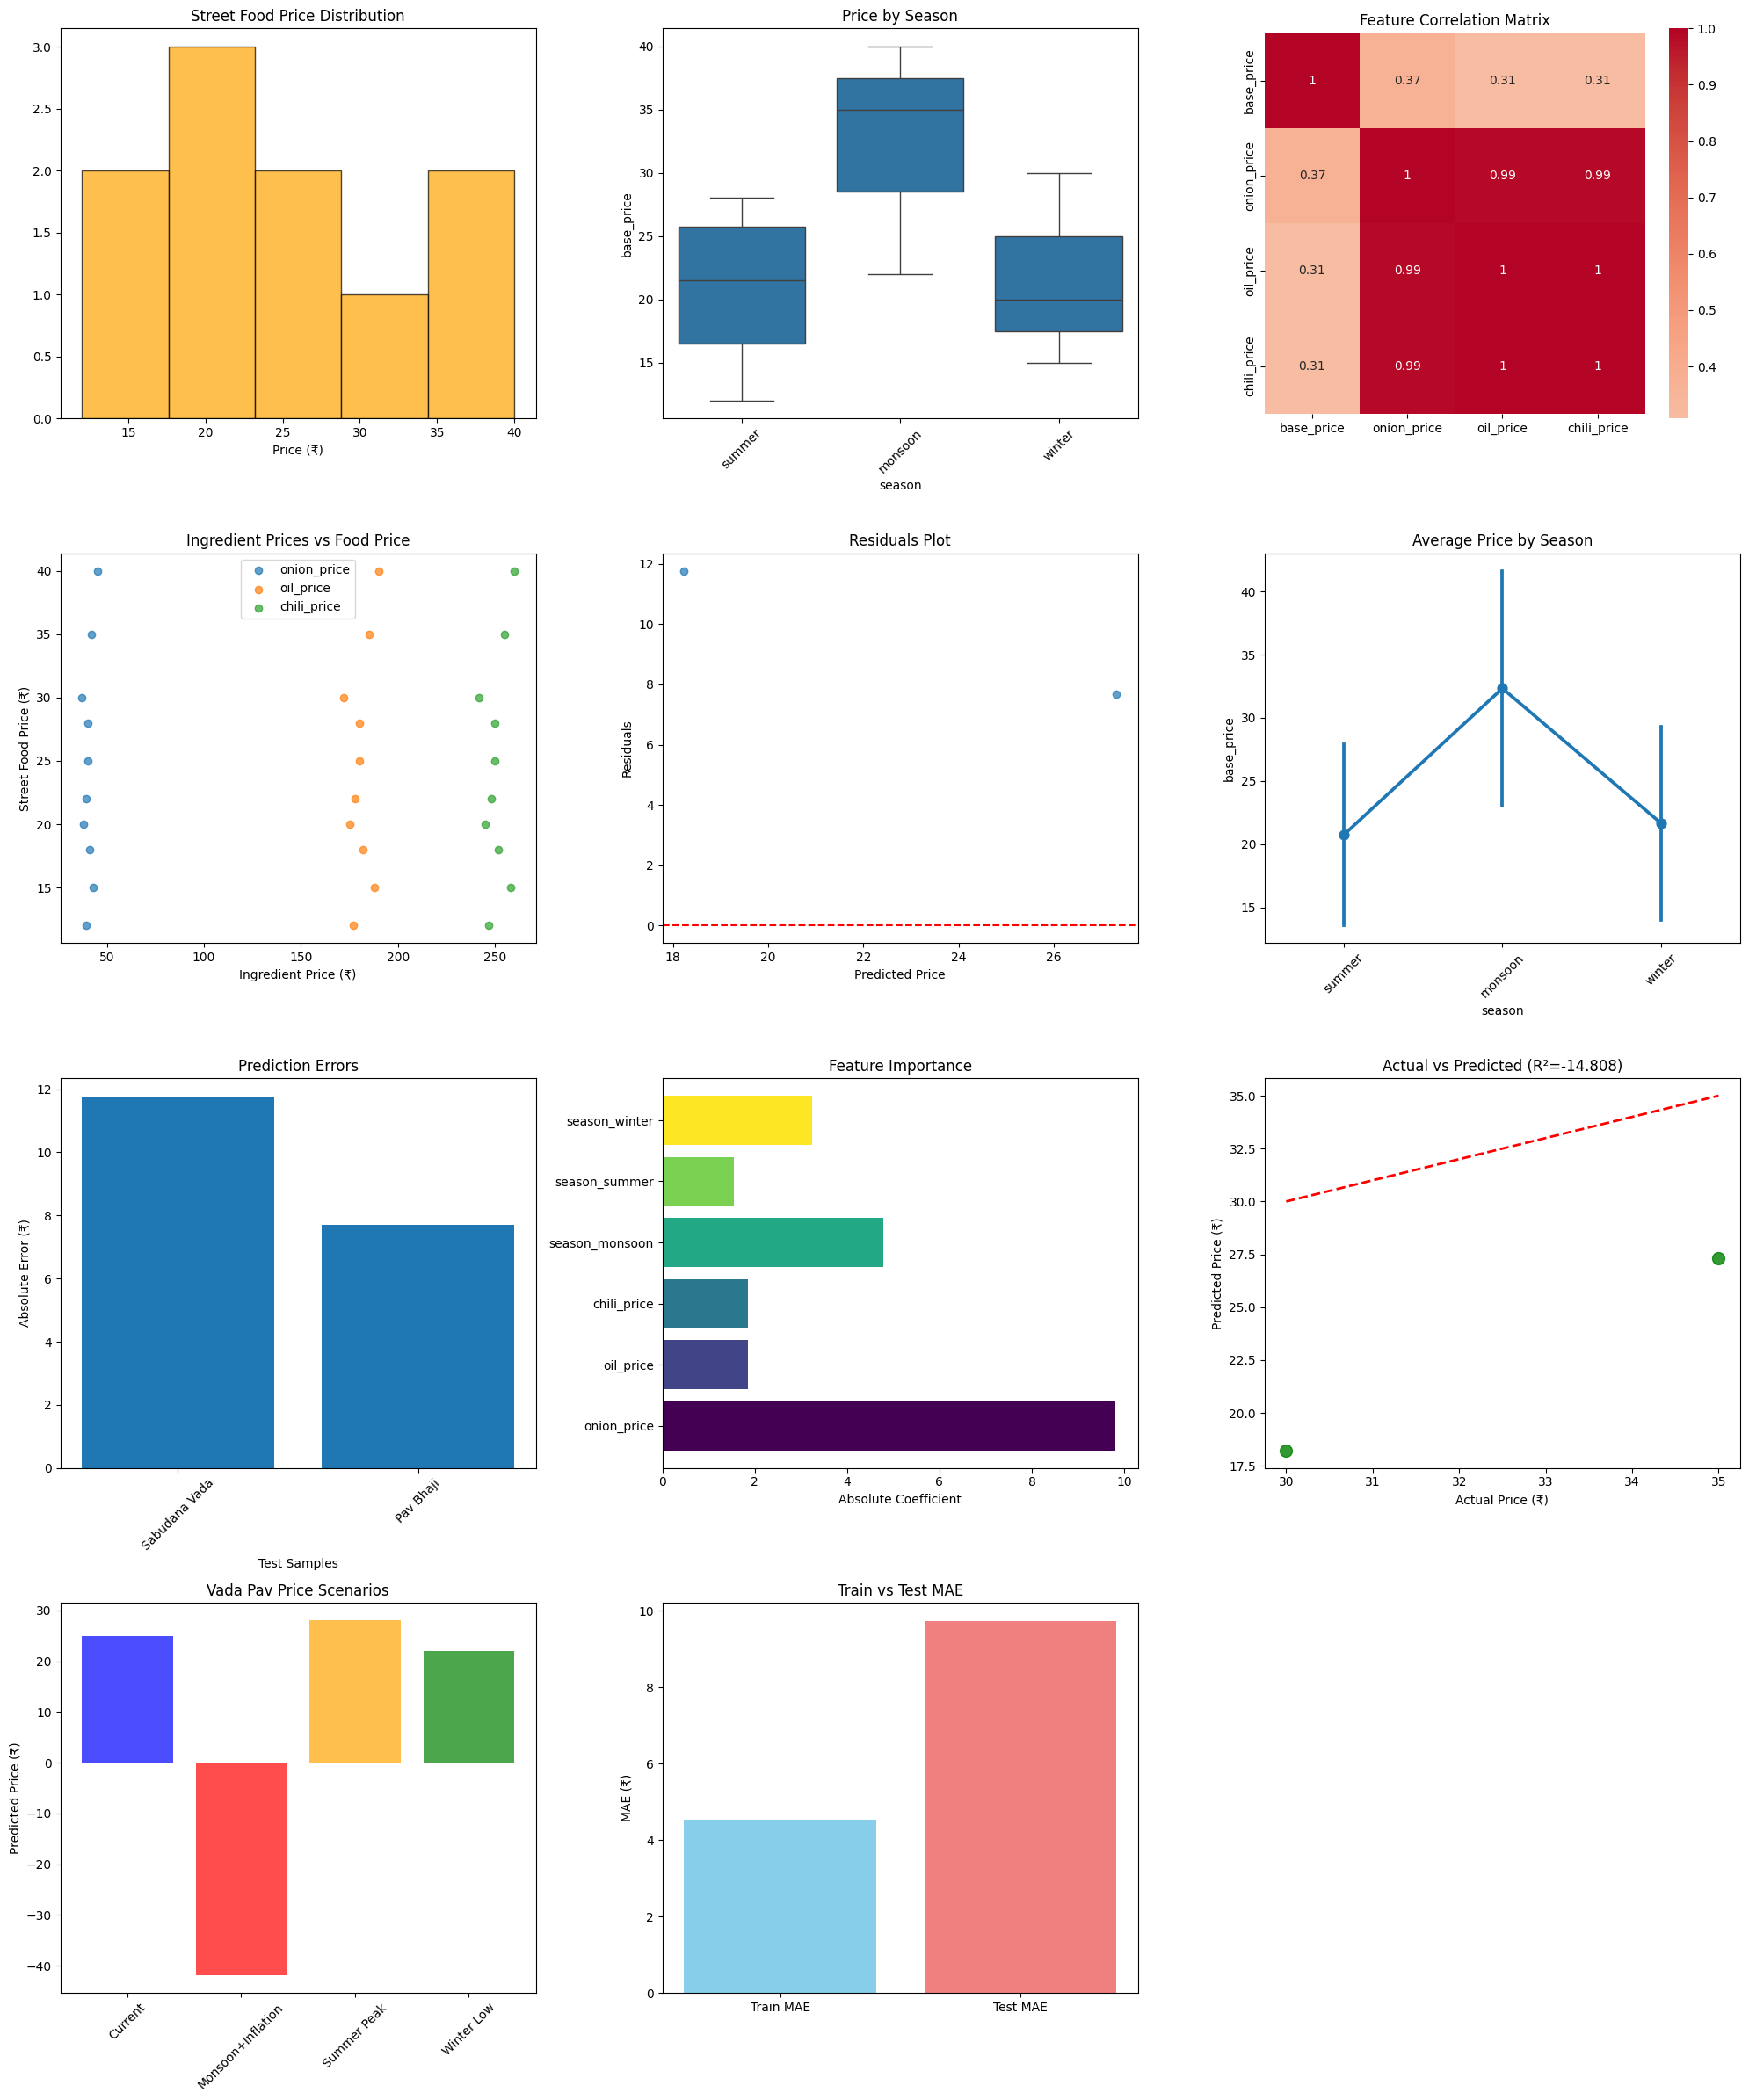

In [196]:
plt.tight_layout()
plt.savefig('street_food_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

In [197]:
print("\n✅ Fixed! Dashboard saved as 'street_food_dashboard.png'")


✅ Fixed! Dashboard saved as 'street_food_dashboard.png'
